In [115]:
# Program      : Euler's Method                                                                            
# Author       : MOOC team Mathematical Modelling Basics
# Created      : April, 2020

In [116]:
#Differential Equation of fish population
def fishPopulation(startingPopulation, dt):
    P = startingPopulation
    dPdt = 0.7*P*(1-P/750)-20
    P += dPdt * dt
    return P

In [117]:
#System of Differential Equations of rainbow and deadly fish population
def twoFishPopulation(startingPopulations, dt):
    P = startingPopulations[0]
    G = startingPopulations[1]
    #The first equation
    dPdt = 0.7*P-0.007*P**2-0.04*P*G
    #Second equation
    dGdt = -0.25*G+0.008*P*G

    P += dPdt
    G += dGdt
    return [P, G]


In [118]:
from math import ceil

def eulersMethod(dt, startingPopulation, days, ode):
    numberOfTimes = int(days/dt)
    if (dt <= 0 or numberOfTimes <= 0 or isinstance(numberOfTimes, int)==False):
         print("Don't do that")
         return [0]*numberOfTimes

    #This function returns an array that contains the history of the fish population. 
    else:
        currentPopulation = startingPopulation
        populationHistory = [0]
        populationHistory[0] = currentPopulation
        for i in range(numberOfTimes):
            currentPopulation = ode(currentPopulation, dt)
            #If the population drops below 0, quit
            #if (currentPopulation <= 0):
            #    print(f"less than 0 population at {i} with value {currentPopulation}")
            #    return populationHistory

            populationHistory.append(currentPopulation) 

    return populationHistory

In [119]:
def printResults(results, dt, text="The result is:"):
    for i in range(len(results)):
        print(f"On day {i*dt} {text} {results[i]}")

In [120]:
import matplotlib.pyplot as plt
from math import ceil

def plotResults(results, dt):    
    for j in range(len(results)):
        plt.plot([i*dt[j]+1 for i in range(len(results[j]))], results[j])
    plt.ylabel('Fish')
    plt.xlabel('Days')
    plt.grid(True)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()

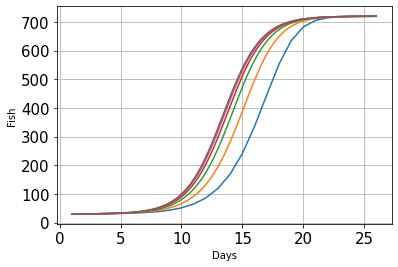

On day 0 The result is: 30
On day 1 The result is: 30.16
On day 2 The result is: 30.423016106666665
On day 3 The result is: 30.85527146624193
On day 4 The result is: 31.56538356717283
On day 5 The result is: 32.731203520433915
On day 6 The result is: 34.64313641310133
On day 7 The result is: 37.77319479510463
On day 8 The result is: 42.88273785631755
On day 9 The result is: 51.184320430089755
On day 10 The result is: 64.56816571712181
On day 11 The result is: 85.87477022997163
On day 12 The result is: 119.10426497303804
On day 13 The result is: 169.23714624838152
On day 14 The result is: 240.97135106330558
On day 15 The result is: 335.4552509098963
On day 16 The result is: 445.2457162080036
On day 17 The result is: 551.8902196054665
On day 18 The result is: 633.9360797995344
On day 19 The result is: 682.608045939047
On day 20 The result is: 705.5435166743707
On day 21 The result is: 714.818434686608
On day 22 The result is: 718.2903040372753
On day 23 The result is: 719.5486200476707
O

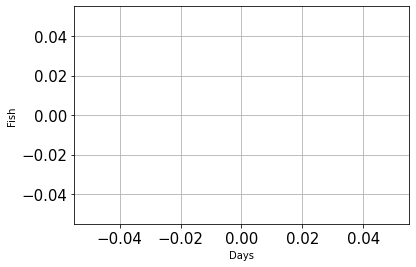

In [121]:
#Main
days = 25
startingPopulation = 30
dt = [1, 1/2, 1/4, 1/8, 1/16, 1/32]

#Fish at 13 with dt= 1/8   407.24955562528396


populationHistory = []
populationHistory.append(eulersMethod(dt[0],startingPopulation,days,fishPopulation))
populationHistory.append(eulersMethod(dt[1],startingPopulation,days,fishPopulation))
populationHistory.append(eulersMethod(dt[2],startingPopulation,days,fishPopulation))
populationHistory.append(eulersMethod(dt[3],startingPopulation,days,fishPopulation))
populationHistory.append(eulersMethod(dt[4],startingPopulation,days,fishPopulation))
populationHistory.append(eulersMethod(dt[5],startingPopulation,days,fishPopulation))

plotResults(populationHistory, dt)
printResults(populationHistory[0], dt[0])

errorHistory = []
errorHistory.append(errorFunction(populationHistory[5], populationHistory[4], dt[5]))
plotResults(errorHistory, dt)

#print(f"POpulation history:{populationHistory}   error history: {errorHistory}")

In [131]:
def errorFunction(result, resultTimesTwo, dt):
    newResults = []
    for i in range(len(resultTimesTwo)):
        try:
            newResults.append(abs(result[2*i][1]-resultTimesTwo[i][1]))
        except:
            break

    return newResults


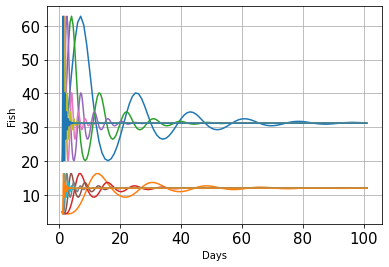

0.035404640635547935
On day 12.5 The error between the two are: 0.04155377435812646
On day 12.625 The error between the two are: 0.04200807681074181
On day 12.75 The error between the two are: 0.03733075033074762
On day 12.875 The error between the two are: 0.028648478695579627
On day 13.0 The error between the two are: 0.01743427240513995
On day 13.125 The error between the two are: 0.0052858135154245645
On day 13.25 The error between the two are: 0.0062719603862362305
On day 13.375 The error between the two are: 0.01594507889078045
On day 13.5 The error between the two are: 0.022784474556852174
On day 13.625 The error between the two are: 0.026254874213146095
On day 13.75 The error between the two are: 0.026258369269520188
On day 13.875 The error between the two are: 0.02311222120708223
On day 14.0 The error between the two are: 0.0174823387375298
On day 14.125 The error between the two are: 0.010278609783950898
On day 14.25 The error between the two are: 0.002524623950003857
On day 

In [135]:
dt = [1, 1/2, 1/4, 1/8, 1/16, 1/32]
startingPopulation = [20, 5]
days = 100

populationHistory = []
for i in range(len(dt)):
    populationHistory.append(eulersMethod(dt[i],startingPopulation,days, twoFishPopulation))
    

plotResults(populationHistory, dt)
printResults(populationHistory[3], dt[3], "The population is: ")
#print(populationHistory[0])
err = errorFunction(populationHistory[3], populationHistory[4], dt[3])
#printResults(err, dt[3], 'The error between the two are:')